<a href="https://colab.research.google.com/github/DaveChui/WEEK3IP/blob/main/Week_3_Python_ip_Dave_Njoroge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import pandas as pd
# as well as the Numpy library
import numpy as np
import requests

In [75]:
# data loading and cleaning 
cells_geo_data = pd.read_csv('/content/cells_geo.csv',delimiter=';')
cells_geo_data.head()


,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f


In [76]:
# delete the unnecessary column i.e the first column
cells_geo_data.iloc[: , 1:]

,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE
0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17
1,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17
2,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17
3,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f
4,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f
...,...,...,...,...,...,...,...,...,...,...,...
3969,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,1cfc2d7ab1,f91ed8d2e9
3970,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.039694,7.428611,MARAHOUE,CENTRE NORTH,3ae1708153,f91ed8d2e9
3971,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,cb71f8a29c,61bee9c70c
3972,ZUENOULA,In Service,INTERIEUR,Grand-NORD,ZONE A - Grand-NORD,-6.065450,7.444592,MARAHOUE,CENTRE NORTH,d4a6a0b645,61bee9c70c


In [77]:
# remove the unnecessary characters in DECOUPZONE and ZONENAME column headers
cells_geo_data['DECOUPZONE'].str.replace('"','')
cells_geo_data['ZONENAME'].str.replace('"','')

0                  AGBANNEW
1                  AGBANNEW
2                  AGBANNEW
3                   ASSINIE
4                   ASSINIE
               ...         
3969    ZONE A - Grand-NORD
3970    ZONE A - Grand-NORD
3971    ZONE A - Grand-NORD
3972    ZONE A - Grand-NORD
3973    ZONE A - Grand-NORD
Name: ZONENAME, Length: 3974, dtype: object

In [79]:
# Change the string values to upper case for easier readerbility
cells_geo_data['VILLES'].str.upper()
cells_geo_data['DECOUPZONE'].str.upper()
cells_geo_data['LOCALISATION'].str.upper()
cells_geo_data['ZONENAME'].str.upper()
cells_geo_data['REGION'].str.upper()

0          LAGUNE
1          LAGUNE
2          LAGUNE
3       SUD COMOE
4       SUD COMOE
          ...    
3969     MARAHOUE
3970     MARAHOUE
3971     MARAHOUE
3972     MARAHOUE
3973     MARAHOUE
Name: REGION, Length: 3974, dtype: object

In [80]:
# reading the files and creating dataframes for them
df1 = pd.read_csv('cells_geo.csv', delimiter = ';')
df2 = pd.read_csv('Telcom_dataset.csv')
df3 = pd.read_csv('Telcom_dataset2.csv')
df4 = pd.read_csv('Telcom_dataset3.csv')

In [85]:
# combining the three Telcom datasets
telcomdatasets = pd.concat([df2, df3, df4])
# changing telcomdatasets to csv
telcomdatasets.to_csv("telcomdata.csv", index=False)


In [86]:
#read the combined dataframe 
df5 = pd.read_csv('telcomdata.csv')
df5

,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,CELL_ID,SITE_ID,PRODUCT,DATE_TIME,DW_A_NUMBER,DW_B_NUMBER,CELLID,SIET_ID
0,Voice,0,2012-05-06 23:04:37.0,1,49fae048b547780,1a49f8b0ded9de6,19e2e,19e2e,/TJNe+Mmtu,/TJNe+Mmtu,NaN,NaN,NaN,NaN,NaN,NaN
1,sms,0,2012-05-06 23:05:25.0,0,7a54a6eaee19e65,93343ba6e41af95,19e2e,19e2e,/+cKZKIp41,/+cKZKIp41,NaN,NaN,NaN,NaN,NaN,NaN
2,sms,25,2012-05-06 23:05:41.0,0,6008887b0207d82,7aacc9709ce0a20,19e2e,19e2e,/u0FSD+ahi,/u0FSD+ahi,NaN,NaN,NaN,NaN,NaN,NaN
3,Voice,56,2012-05-06 23:05:42.0,1,7370032e20f4e96,6af4a60e74c91d3,19e2e,19e2e,+cNeJzsTp3,+cNeJzsTp3,NaN,NaN,NaN,NaN,NaN,NaN
4,Voice,14,2012-05-06 23:06:29.0,1,966ba4656e38e62,02aa736ee555d5c,19e2e,19e2e,051KhYDCpv,051KhYDCpv,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14998,NaN,0,NaN,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,NaN,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,2aa04dcab7,f7d63a29e5
14999,NaN,62,NaN,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,NaN,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,7f1f2f889f,b4ddb9e93c
15000,NaN,32,NaN,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,NaN,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,a4731e780e,d68260ef50
15001,NaN,30,NaN,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,NaN,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,98ed726da2,b4130b54ab


In [88]:
#combine cells_geo data with our new dataframe df5(with the 3 datasets) then convert it to csv
combineddatasets = pd.concat([df1, df5])
combineddatasets.to_csv("combineddatasets.csv", index=False)

In [89]:
#read from the new dataset and create a dataframe
df6 = pd.read_csv('combineddatasets.csv')
df6

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,SITE_ID,PRODUCT,DATE_TIME,DW_A_NUMBER,DW_B_NUMBER,CELLID,SIET_ID
0,0.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,2aa04dcab7,f7d63a29e5
18973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,7f1f2f889f,b4ddb9e93c
18974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,a4731e780e,d68260ef50
18975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,98ed726da2,b4130b54ab


In [90]:
#check in df6 for missing values
df6.isnull()

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,SITE_ID,PRODUCT,DATE_TIME,DW_A_NUMBER,DW_B_NUMBER,CELLID,SIET_ID
0,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
2,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
3,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
4,False,False,False,False,False,False,False,False,False,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18972,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,True,False,False,True,True,False,False
18973,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,True,False,False,True,True,False,False
18974,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,True,False,False,True,True,False,False
18975,True,True,True,True,True,True,True,True,True,True,True,True,True,False,True,False,False,False,False,False,True,False,False,True,True,False,False


In [91]:
#summarize the list of missing values
df6.isnull().sum() 

Unnamed: 0         15003
VILLES             15003
STATUS             15070
LOCALISATION       15003
DECOUPZONE         15003
ZONENAME           15009
LONGITUDE          15003
LATITUDE           15003
REGION             15003
AREA               15026
CELL_ID             5001
SITE_CODE          15003
PRODUTC            13976
VALUE               3974
DATETIME           13976
CELL_ON_SITE        3974
DW_A_NUMBER_INT     8975
DW_B_NUMBER_INT     8975
COUNTRY_A           3974
COUNTRY_B           3974
SITE_ID            10367
PRODUCT             8975
DATE_TIME           8975
DW_A_NUMBER        13976
DW_B_NUMBER        13976
CELLID             13976
SIET_ID            14581
dtype: int64

In [92]:
# missing values
df6_missing_removed = df6.dropna()
df6_missing_removed


,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,SITE_ID,PRODUCT,DATE_TIME,DW_A_NUMBER,DW_B_NUMBER,CELLID,SIET_ID


In [93]:
# Delete all rows where all cells' values == is NA
df6_clean_NA = df6.dropna(how='all')
df6_clean_NA

,Unnamed: 0,VILLES,STATUS,LOCALISATION,DECOUPZONE,ZONENAME,LONGITUDE,LATITUDE,REGION,AREA,CELL_ID,SITE_CODE,PRODUTC,VALUE,DATETIME,CELL_ON_SITE,DW_A_NUMBER_INT,DW_B_NUMBER_INT,COUNTRY_A,COUNTRY_B,SITE_ID,PRODUCT,DATE_TIME,DW_A_NUMBER,DW_B_NUMBER,CELLID,SIET_ID
0,0.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,fbb2e75af3,0bb492ef17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,1502501d78,0bb492ef17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.0,ADJAME,In Service,ABIDJAN,"""Abidjan_EST",AGBANNEW,-4.000667,5.368194,LAGUNE,NaN,0c2e182a0c,0bb492ef17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,69bdfc69fd,8a1e6ce31f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.0,ASSINIE,In Service,INTERIEUR,Grand-EST,"ASSINIE""",-3.488467,5.158761,SUD COMOE,NaN,7a1029d2ab,8a1e6ce31f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18972,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,3,467333ade2b4b9c,0ab2acd804d01fe,19e2e,19e2e,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,2aa04dcab7,f7d63a29e5
18973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,1,e077a6b74c5053c,4c8098eb6ea1a41,19e2e,19e2e,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,7f1f2f889f,b4ddb9e93c
18974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,32.0,NaN,1,77f53c39d27c050,9d064f013e2cab2,19e2e,19e2e,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,a4731e780e,d68260ef50
18975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.0,NaN,2,672ce74c418aa7a,f9ff5af59cf0d68,19e2e,19e2e,NaN,Voice,2012-05-09 00:01:43.0,NaN,NaN,98ed726da2,b4130b54ab


In [94]:
# delete all duplicates in df6
df6=df6.drop_duplicates(inplace=True)

In [96]:
# details about the active dataframe
cells_geo_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    3974 non-null   int64  
 1   VILLES        3974 non-null   object 
 2   STATUS        3907 non-null   object 
 3   LOCALISATION  3974 non-null   object 
 4   DECOUPZONE    3974 non-null   object 
 5   ZONENAME      3968 non-null   object 
 6   LONGITUDE     3974 non-null   float64
 7   LATITUDE      3974 non-null   float64
 8   REGION        3974 non-null   object 
 9   AREA          3951 non-null   object 
 10  CELL_ID       3974 non-null   object 
 11  SITE_CODE     3974 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 372.7+ KB


In [97]:
#compute and display summary statistics for our dataframe
cells_geo_data.describe()

,Unnamed: 0,LONGITUDE,LATITUDE
count,3974.000000,3974.000000,3974.000000
mean,1986.500000,-4.877659,6.244749
std,1147.339313,1.300771,1.304199
min,0.000000,-8.503889,0.000000
25%,993.250000,-5.846139,5.338639
50%,1986.500000,-4.084500,5.475000
75%,2979.750000,-3.993444,6.872306
max,3973.000000,-0.000000,10.481861


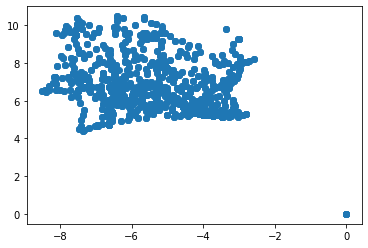

In [99]:
# we can check the outlier cordinates as well as the dense usage areas
import matplotlib.pyplot as plt
plt.scatter(x=cells_geo_data['LONGITUDE'], y=cells_geo_data['LATITUDE'])
plt.show()

In [116]:
# Maximum value of telecom billing price


df6_clean_NA["VALUE"].max()


12900.0

In [137]:
#sorting the data by value and villes in descending order and  then displaying
#Checking which area/ville had the highest usage


sorted_df6 = df6_clean_NA.sort_values(by=['VALUE'], ascending=False)

sorted_df6 = sorted_df6[['VILLES','LOCALISATION','REGION','ZONENAME','VALUE']]
print(sorted_df6)


         VILLES LOCALISATION    REGION             ZONENAME    VALUE
15526       NaN          NaN       NaN                  NaN  12900.0
15812       NaN          NaN       NaN                  NaN   6750.0
5202        NaN          NaN       NaN                  NaN   4440.0
14434       NaN          NaN       NaN                  NaN   4212.0
10046       NaN          NaN       NaN                  NaN   3380.0
...         ...          ...       ...                  ...      ...
3969   ZUENOULA    INTERIEUR  MARAHOUE  ZONE A - Grand-NORD      NaN
3970   ZUENOULA    INTERIEUR  MARAHOUE  ZONE A - Grand-NORD      NaN
3971   ZUENOULA    INTERIEUR  MARAHOUE  ZONE A - Grand-NORD      NaN
3972   ZUENOULA    INTERIEUR  MARAHOUE  ZONE A - Grand-NORD      NaN
3973   ZUENOULA    INTERIEUR  MARAHOUE  ZONE A - Grand-NORD      NaN

[18977 rows x 5 columns]


In [143]:
#to check which city had the higest usage

sorted_df6.VILLES.value_counts()

COCODY             354
YOPOUGON           295
ABOBO              255
MARCORY            141
TREICHVILLE        132
                  ... 
DOUGROUPALEGNOA      3
KOTOULA              2
MEMNI                2
OUANGOLO             1
DANANON              1
Name: VILLES, Length: 504, dtype: int64